# DASK
---

Basically, Dask is simple to use, just like a Pandas DataFrame.<br/>
However, there are some differences between a Pandas DataFrame and a Dask DataFrame.

In [1]:
import dask
import dask.dataframe as dd

In [2]:
dask_df = dd.read_csv("../data/titanic/train.csv")

First, Dask does not use eager execution. <br/>
This means you cannot see the results of your operations immediately.



In [3]:
dask_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
npartitions=1,,,,,,,,,,,,
,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
dask_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
npartitions=1,,,,,,,
,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...


Did you see that? Dask ran read_csv(),<br/>
but the describe() method can only display the column names and their data types.<br/><br/>
Let's use the visualize() method.<br/>
It displays a Dask DataFrame's computational graph, showing how the graph is constructed.





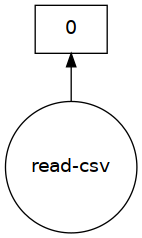

In [5]:
dask_df.visualize()

We only know how to compute on Dask, but how does the data flow through this graph? <br/>
It's simple: you can use the .compute() method, and Dask will execute the operations as depicted in the graph.

In [6]:
dask_df = dask_df.compute()

In [7]:
dask_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dask_df.visualize()

AttributeError: 'DataFrame' object has no attribute 'visualize'

Yeah, it's easy.<br/> Now we can see the data in the DataFrame.



In [17]:
dask_df['PassengerId'] + 10

0       11
1       12
2       13
3       14
4       15
      ... 
886    897
887    898
888    899
889    900
890    901
Name: PassengerId, Length: 891, dtype: int64

# Dask GPU

In [9]:
import dask
import dask.dataframe as dd
b
dask.config.set({"dataframe.backend": "cudf"})

If you want to use Dask on a GPU<br/> 
You only need to set dask.config 'dataframe.backend = "cudf"'

In [10]:
dask_gdf = dd.read_csv("../data/titanic/train.csv")

In [11]:
dask_gdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
npartitions=1,,,,,,,,,,,,
,int64,int64,int64,object,object,int64,int64,int64,object,float64,object,object
,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
dask_gdf = dask_gdf.compute()

In [14]:
dask_gdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,<NA>,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,<NA>,1,2,W./C. 6607,23.4500,<NA>,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
dask_gdf.describe()

/home/cvmi_jeyoung/anaconda3/envs/rapids/lib/python3.9/site-packages/cudf/core/dataframe.py:5059: FutureWarning: `datetime_is_numeric` is deprecated. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(
/home/cvmi_jeyoung/anaconda3/envs/rapids/lib/python3.9/site-packages/cudf/core/series.py:3334: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
